### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
pip install --upgrade keras-hypetune

     |████████████████████████████████| 965 kB 735 kB/s 
  Attempting uninstall: hyperopt
    Found existing installation: hyperopt 0.1.2
    Uninstalling hyperopt-0.1.2:
      Successfully uninstalled hyperopt-0.1.2


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

import numpy                      as np
import pandas                     as pd
import matplotlib.pyplot          as plt
import seaborn as sns
import warnings
from statsmodels.tsa.seasonal  import seasonal_decompose
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
from   datetime                        import  datetime,timedelta
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools         import  adfuller
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from   IPython.display                 import  display
from   pylab   import  rcParams 
import warnings
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
from   datetime                        import  datetime,timedelta
from math import sqrt
%matplotlib inline
from   pylab                           import  rcParams 
from   datetime                        import  datetime, timedelta
from statsmodels.graphics.gofplots     import qqplot
from statsmodels.tsa.seasonal          import seasonal_decompose
from statsmodels.tsa.arima_model       import  ARMA, ARIMA
import warnings
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
from sklearn                              import  metrics
from statsmodels.tsa.vector_ar.vecm       import  coint_johansen
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.tsa.api                  import  VAR
from statsmodels.tsa.statespace.varmax    import  VARMAX

## Read Data.

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
mpl.rcParams['figure.figsize'] = (15, 7)
mpl.rcParams['axes.grid'] = False

mpl.rcParams['figure.figsize'] = (20, 7)
mpl.rcParams['axes.grid'] = False

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.vector_ar.var_model import VAR

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from kerashypetune import KerasRandomSearch, KerasGridSearch

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/M-tech Thesis/Reliance india.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-1996,15.859429,15.944529,15.754989,15.917452,10.509537,48051995.0
1,02-01-1996,15.878770,15.956133,15.677626,15.793671,10.427812,77875009.0
2,03-01-1996,16.052837,16.783918,15.878770,15.913584,10.506983,96602936.0
3,04-01-1996,15.762726,15.813012,15.553845,15.766594,10.409933,100099436.0
4,05-01-1996,15.704703,15.704703,15.522900,15.658285,10.338421,76935930.0


In [ ]:
data['Date'] = pd.to_datetime(data.Date,format='%d-%m-%Y')
data.index = data['Date']
data = data.drop('Date',axis=1)

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,15.859429,15.944529,15.754989,15.917452,10.509537,48051995.0
1996-01-02,15.878770,15.956133,15.677626,15.793671,10.427812,77875009.0
1996-01-03,16.052837,16.783918,15.878770,15.913584,10.506983,96602936.0
1996-01-04,15.762726,15.813012,15.553845,15.766594,10.409933,100099436.0
1996-01-05,15.704703,15.704703,15.522900,15.658285,10.338421,76935930.0


In [ ]:
data.isnull().sum()

Open         10
High         10
Low          10
Close        10
Adj Close    10
Volume       10
dtype: int64

In [ ]:
data['Open'] = data['Open'].fillna(method = 'bfill')
data['High'] = data['High'].fillna(method = 'bfill')
data['Low'] = data['Low'].fillna(method = 'bfill')
data['Close'] = data['Close'].fillna(method = 'bfill')
data['Adj Close'] = data['Adj Close'].fillna(method = 'bfill')
data['Volume'] = data['Volume'].fillna(method = 'bfill')

In [ ]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

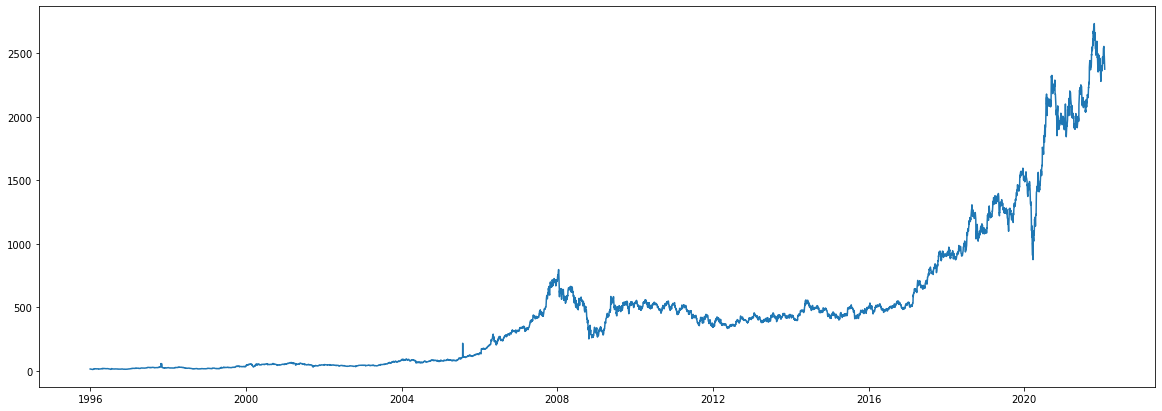

In [ ]:
plt.plot(data['Close'])

In [ ]:
n_data = data.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

In [ ]:
n_data.head()

,Close
Date,
1996-01-01,15.917452
1996-01-02,15.793671
1996-01-03,15.913584
1996-01-04,15.766594
1996-01-05,15.658285


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(n_data).reshape(-1,1))

In [ ]:
print(df1)

[[0.00148044]
 [0.00143494]
 [0.00147902]
 ...
 [0.90661625]
 [0.86986931]
 [0.86815976]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.90)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(5912, 657)

In [ ]:
train_data

array([[0.00148044],
       [0.00143494],
       [0.00147902],
       ...,
       [0.4799237 ],
       [0.48006938],
       [0.49101359]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(5811, 100)
(5811,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(556, 100)
(556,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Flatten())
model.add(Dense(128,activation ='relu'))
model.add(Dense(64,activation ='relu'))
model.add(Dense(32,activation ='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               6528      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)               

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
91/91 [==============================] - 25s 200ms/step - loss: 0.0016 - val_loss: 0.0127
Epoch 2/100
91/91 [==============================] - 17s 184ms/step - loss: 1.0489e-04 - val_loss: 0.0056
Epoch 3/100
91/91 [==============================] - 17s 182ms/step - loss: 9.5433e-05 - val_loss: 0.0041
Epoch 4/100
91/91 [==============================] - 18s 195ms/step - loss: 8.7799e-05 - val_loss: 0.0029
Epoch 5/100
91/91 [==============================] - 17s 184ms/step - loss: 7.9586e-05 - val_loss: 0.0074
Epoch 6/100
91/91 [==============================] - 17s 184ms/step - loss: 8.1511e-05 - val_loss: 0.0040
Epoch 7/100
91/91 [==============================] - 17s 184ms/step - loss: 6.8960e-05 - val_loss: 0.0028
Epoch 8/100
91/91 [==============================] - 17s 182ms/step - loss: 6.5415e-05 - val_loss: 0.0033
Epoch 9/100
91/91 [==============================] - 17s 183ms/step - loss: 6.1516e-05 - val_loss: 0.0052
Epoch 10/100
91/91 [==============================

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

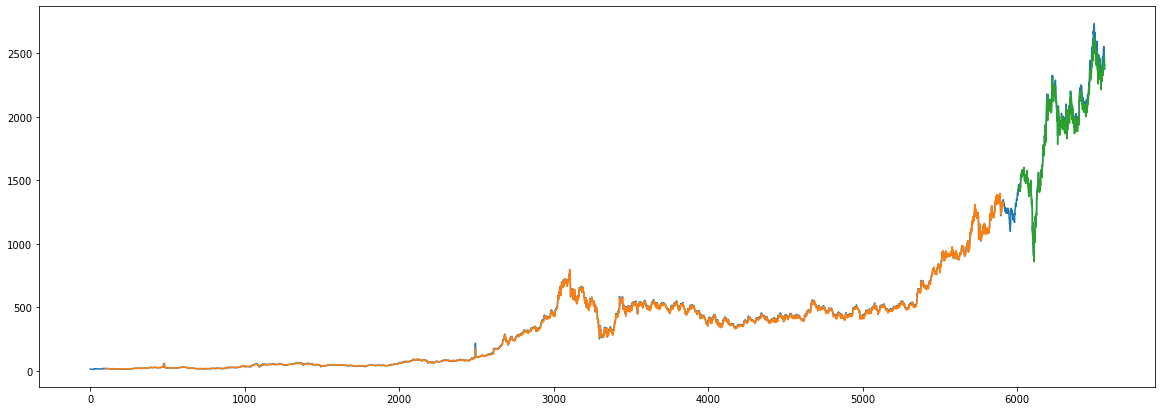

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

657

In [ ]:
x_input=test_data[557:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8391703210845801,
 0.8737664618238782,
 0.8874064073619768,
 0.8930314192771365,
 0.8895204095094663,
 0.8874064073619768,
 0.8675347691606016,
 0.8663950102337447,
 0.8700164238554805,
 0.8883622499402651,
 0.8745201675610014,
 0.8759172652560562,
 0.8797224150766128,
 0.8892078688142356,
 0.9110463940992202,
 0.9083993137729909,
 0.9237488076265009,
 0.9324254437748418,
 0.9249988803325495,
 0.9218370323950505,
 0.9234730682159588,
 0.935403375363772,
 0.9549073610177579,
 0.9367637618490123,
 0.9413777292588509,
 0.9777202195982488,
 0.9708818461868552,
 0.97645183632473,
 0.9864335669564044,
 0.9884372553247022,
 0.9910844257258055,
 0.9999999999999999,
 0.9884372553247022,
 0.9597971579130126,
 0.9615986193652714,
 0.9521867681970255,
 0.9739701816298512,
 0.9615986193652714,
 0.951010298060354,
 0.9280871257006714,
 0.9286570051640999,
 0.9150538609106897,
 0.9087302551105657,
 0.9143369564582551,
 0.915476625310238,
 0.9227377631211798,
 0.933105546942588,
 0.9348151853328733

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.85199994]
101
1 day input [0.87376646 0.88740641 0.89303142 0.88952041 0.88740641 0.86753477
 0.86639501 0.87001642 0.88836225 0.87452017 0.87591727 0.87972242
 0.88920787 0.91104639 0.90839931 0.92374881 0.93242544 0.92499888
 0.92183703 0.92347307 0.93540338 0.95490736 0.93676376 0.94137773
 0.97772022 0.97088185 0.97645184 0.98643357 0.98843726 0.99108443
 1.         0.98843726 0.95979716 0.96159862 0.95218677 0.97397018
 0.96159862 0.9510103  0.92808713 0.92865701 0.91505386 0.90873026
 0.91433696 0.91547663 0.92273776 0.93310555 0.93481519 0.94898821
 0.94336311 0.92134067 0.90152423 0.90494342 0.86466706 0.87279222
 0.86012652 0.91216775 0.88262692 0.89325205 0.87997975 0.90262719
 0.90845452 0.8810276  0.8642443  0.87132161 0.88464901 0.89874843
 0.89966757 0.88154228 0.87069653 0.86814136 0.87942828 0.85610074
 0.83290192 0.8453653  0.86553108 0.86521854 0.86799433 0.8670568
 0.87740619 0.8789136  0.86295751 0.8662847  0.87940996 0.89935512
 0.90358312 0.88406073 0.89122996 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

6569

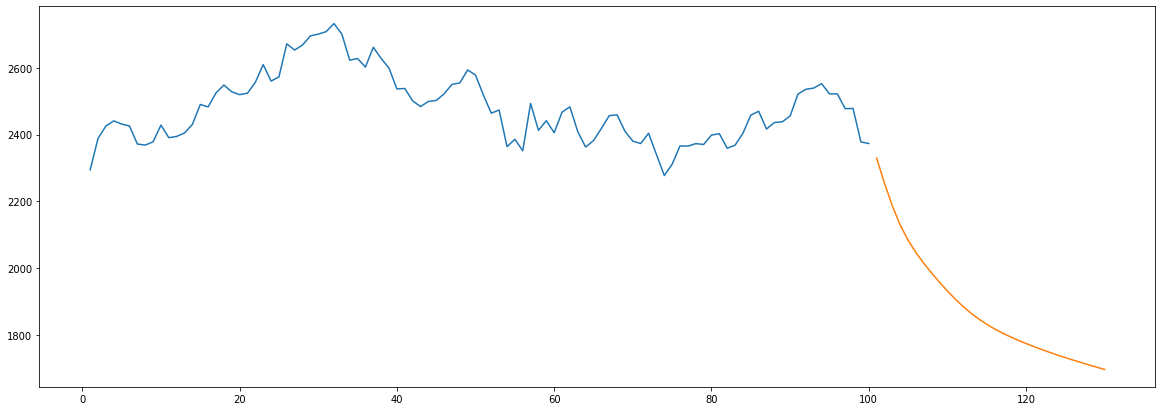

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[6469:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

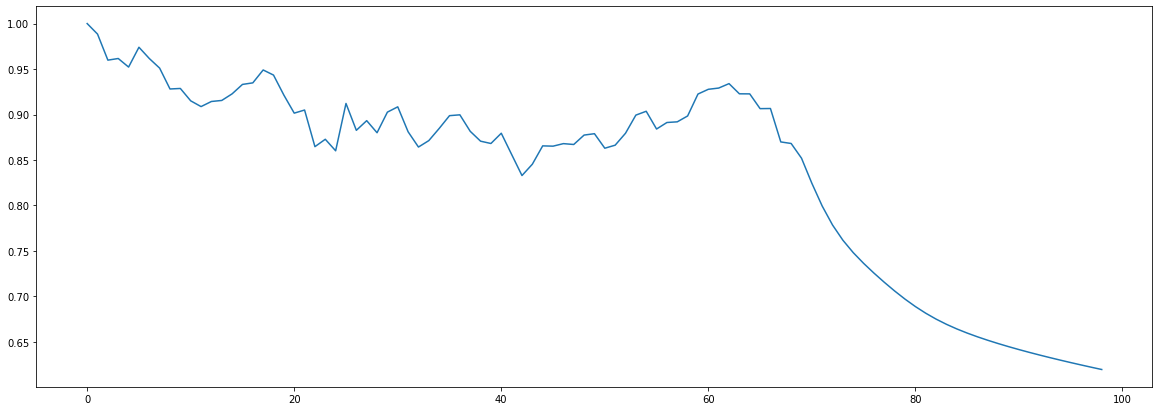

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[6500:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

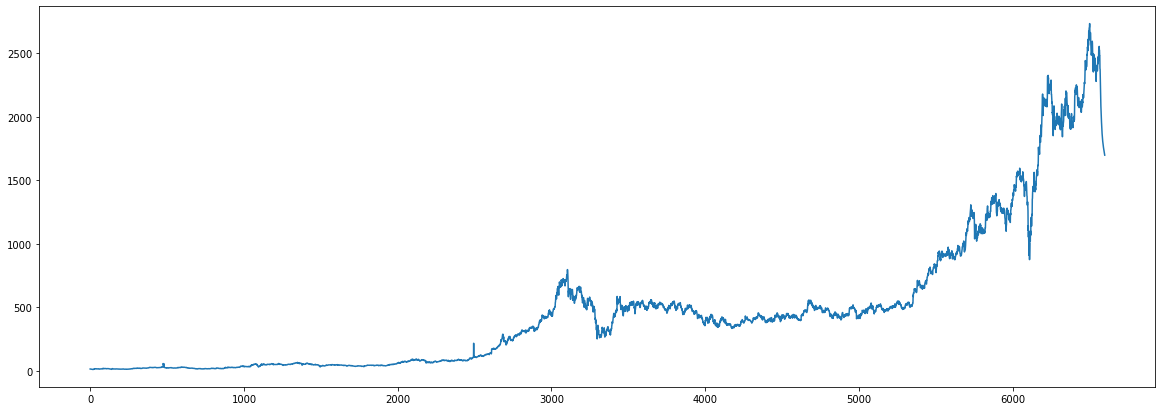

In [ ]:
plt.plot(df3)